<a href="https://colab.research.google.com/github/t-linguist/DPO_Materials/blob/master/ML_1_01_2_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import of the important libraries**

In [ ]:
import matplotlib.pyplot as plt #визуализация
import pandas as pd #таблицы
import sklearn.datasets as ds #датасеты sklearn
from sklearn.datasets import fetch_openml #для скачивания датасетов с OpenML

from sklearn import preprocessing as prep

In [ ]:
plt.style.use('dark_background') # для модных черных рисунков

# **OpenML**

используем функцию fetch_openml для загрузки данных с сайта [OpenML](https://www.openml.org/search?type=data) по имени набора данных

In [ ]:
data  = fetch_openml('credit-g', version=1)
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
data.details

{'citation': 'https://archive.ics.uci.edu/ml/citation_policy.html',
 'collection_date': '1994-11-17',
 'creator': 'Dr. Hans Hofmann',
 'default_target_attribute': 'class',
 'description_version': '3',
 'file_id': '31',
 'format': 'ARFF',
 'id': '31',
 'language': 'English',
 'licence': 'Public',
 'md5_checksum': '9a475053fed0c26ee95cd4525e50074c',
 'name': 'credit-g',
 'original_data_url': 'https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)',
 'paper_url': 'https://dl.acm.org/doi/abs/10.1145/967900.968104',
 'processing_date': '2020-11-20 19:44:53',
 'status': 'active',
 'tag': ['credit_scoring',
  'finance_problem',
  'mythbusting_1',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_14',
  'study_144',
  'study_15',
  'study_20',
  'study_218',
  'study_241',
  'study_34',
  'study_37',
  'study_41',
  'study_50',
  'study_52',
  'study_7',
  'study_70',
  'study_98',
  'study_99',
  'uci'],
 'upload_date': '2014-04-06T23:21:47',
 'url': 'https://

In [ ]:
DF_OML = pd.DataFrame(data.data, columns=data.feature_names)
DF_OML['Target'] = data.target
DF_OML

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,Target
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,4.0,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,good
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,bad
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,3.0,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,good
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,4.0,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,good
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,4.0,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,12.0,2.0,2.0,1736.0,0.0,3.0,3.0,1.0,0.0,4.0,0.0,31.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,good
996,0.0,30.0,2.0,1.0,3857.0,0.0,2.0,4.0,0.0,0.0,4.0,1.0,40.0,2.0,1.0,1.0,3.0,1.0,1.0,0.0,good
997,3.0,12.0,2.0,3.0,804.0,0.0,4.0,4.0,2.0,0.0,4.0,2.0,38.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,good
998,0.0,45.0,2.0,3.0,1845.0,0.0,2.0,4.0,2.0,0.0,4.0,3.0,23.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0,bad


# Числовые данные

**Пример предварительной обработки данных**

Ниже мы будем нормализовать не все признаки, а только те, которые не являются категоричными.

В частности 'duration', 'credit_amount' and 'age'

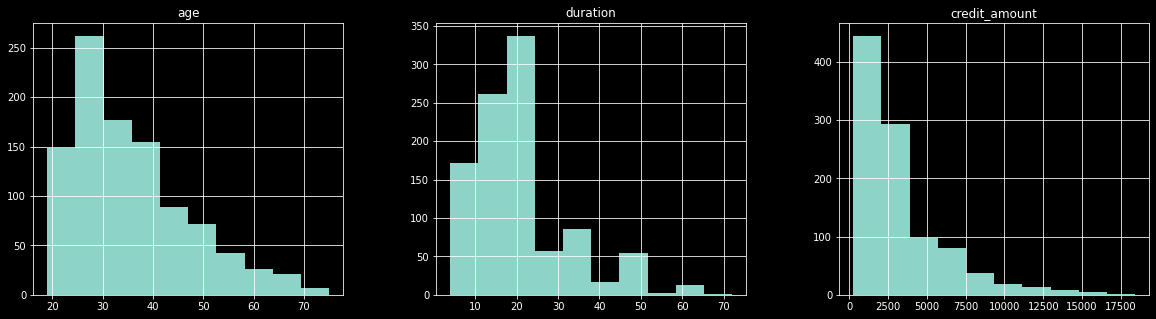

In [ ]:
DF_OML.hist(column=['age','duration','credit_amount'], figsize = (20,5), layout= (1,3));

**Здесь мы просто занимаемся стандартизацией**

Делаем в два шага

**Первый шаг** - создаем объект `StandardScaler()` и его "обучение" `.fit` 

Где мы сохраняем среднее значение (`mean_`) и стандартное отклонение (`scale_`) исходного набора данных

Это полезно, так как вы можете использовать те же значения для других данных в будущем

In [ ]:
Standard = prep.StandardScaler().fit(DF_OML[['age','duration','credit_amount']])
Standard.mean_, Standard.scale_

(array([  35.546,   20.903, 3271.258]),
 array([  11.36977942,   12.05278354, 2821.3251545 ]))

**Шаг второй** — применяем трансформацию `.transform` 

И пакуем результат в Dataframe

In [ ]:
scaled = Standard.transform(DF_OML[['age','duration','credit_amount']])
df_standard = pd.DataFrame(scaled, columns= ['age','duration','credit_amount'])
df_standard

,age,duration,credit_amount
0,2.766456,-1.236478,-0.745131
1,-1.191404,2.248194,0.949817
2,1.183312,-0.738668,-0.416562
3,0.831502,1.750384,1.634247
4,1.535122,0.256953,0.566664
...,...,...,...
995,-0.399832,-0.738668,-0.544162
996,0.391740,0.754763,0.207612
997,0.215835,-0.738668,-0.874503
998,-1.103451,1.999289,-0.505528


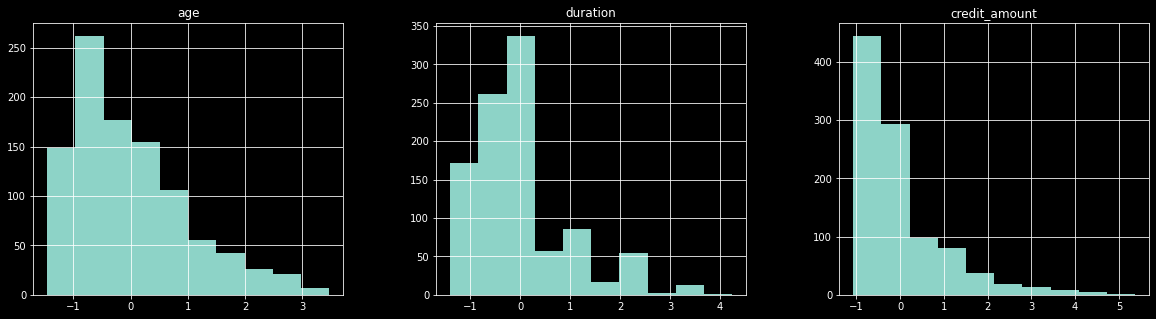

In [ ]:
DF_OML_2 = DF_OML.copy()

DF_OML_2[['age','duration','credit_amount']] = df_standard

DF_OML_2.hist(column=['age','duration','credit_amount'], figsize = (20,5), layout= (1,3));

**Здесь мы делаем степенное преобразование**

Снова в два шага

Создание Объекта `PowerTransformer()` и его "обучение" `.fit` 



In [ ]:
PT = prep.PowerTransformer().fit(DF_OML[['age','duration','credit_amount']])

Коэффициенты степени (на будущее)

In [ ]:
PT.lambdas_

array([-0.70260982,  0.04045942, -0.06457869])

Применение преобразования `.transform`

In [ ]:
pt = PT.transform(DF_OML[['age','duration','credit_amount']])
df_pt = pd.DataFrame(pt, columns= ['age','duration','credit_amount'])
df_pt

,age,duration,credit_amount
0,1.966313,-1.797419,-0.932701
1,-1.607482,1.764587,1.156805
2,1.211497,-0.694530,-0.157831
3,0.977107,1.516606,1.496009
4,1.415985,0.500910,0.911056
...,...,...,...
995,-0.219267,-0.694530,-0.404766
996,0.630240,0.901118,0.621156
997,0.470521,-0.694530,-1.444820
998,-1.409987,1.644479,-0.324644


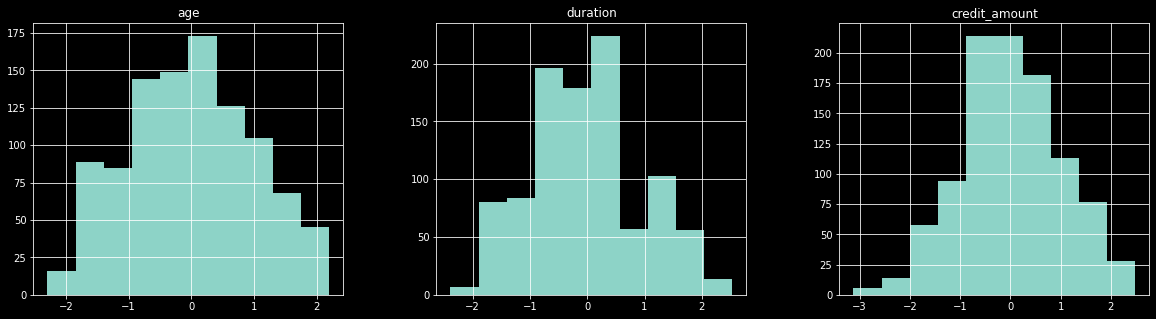

In [ ]:
DF_OML_3 = DF_OML.copy()

DF_OML_3[['age','duration','credit_amount']] = df_pt

DF_OML_3.hist(column=['age','duration','credit_amount'], figsize = (20,5), layout= (1,3));

Теперь мы можем сравнить средние значения для разных классов.

Для каждого из типов предварительной обработки

In [ ]:
DF_OML[['age','duration','credit_amount','Target']].groupby('Target').mean()

,age,duration,credit_amount
Target,,,
bad,33.963333,24.860000,3938.126667
good,36.224286,19.207143,2985.457143


In [ ]:
DF_OML_2[['age','duration','credit_amount','Target']].groupby('Target').mean()

,age,duration,credit_amount
Target,,,
bad,-0.139199,0.328306,0.236367
good,0.059657,-0.140703,-0.101300


In [ ]:
DF_OML_3[['age','duration','credit_amount','Target']].groupby('Target').mean()

,age,duration,credit_amount
Target,,,
bad,-0.166020,0.329299,0.162087
good,0.071151,-0.141128,-0.069466


Тренды сохранились и это главное

# Категориальные данные

In [ ]:
DF_OML.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
Target                      2
dtype: int64

**Ordinal encoding**



Давайте поместим некоторые бинарные категориальные признаки в порядковое кодирование.

In [ ]:
DF_OML[['own_telephone','foreign_worker']]

,own_telephone,foreign_worker
0,yes,yes
1,none,yes
2,none,yes
3,none,yes
4,none,yes
...,...,...
995,none,yes
996,yes,yes
997,none,yes
998,yes,yes


Создаем объект и обучаем

In [ ]:
Ordinal = prep.OrdinalEncoder().fit(DF_OML[['own_telephone','foreign_worker']])
Ordinal.categories_

[array(['none', 'yes'], dtype=object), array(['no', 'yes'], dtype=object)]

трансформируем

In [ ]:
Ordinal_encoded = Ordinal.transform(DF_OML[['own_telephone','foreign_worker']])
pd.DataFrame(Ordinal_encoded, columns = Ordinal.feature_names_in_).astype(int)

,own_telephone,foreign_worker
0,1,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
995,0,1
996,1,1
997,0,1
998,1,1


**Label encoding**

Та же идея, но в основном используется для целей (y)

И подразумевает одномерные массивы с формой `(n_points,)`

Не двумерные массивы (даже с формой `(n_points,1)`)

In [ ]:
Label = prep.LabelEncoder().fit(DF_OML['Target'])
Label.classes_

array(['bad', 'good'], dtype=object)

применяем

In [ ]:
Label_encoded = Label.transform(DF_OML['Target'])
pd.DataFrame(Label_encoded, columns = ['Target'])

,Target
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


**One-Hot Encoding**

Давайте выберем некоторые признаки с несколькими категориями

In [ ]:
OneHotEncoded = prep.OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False)
OneHotEncoded.fit(DF_OML[['checking_status','employment','own_telephone']])
OneHotEncoded.categories_

[array(['0<=X<200', '<0', '>=200', 'no checking'], dtype=object),
 array(['1<=X<4', '4<=X<7', '<1', '>=7', 'unemployed'], dtype=object),
 array(['none', 'yes'], dtype=object)]

Можно достаточно легко сформировать название столбцов

In [ ]:
OHE_feat = OneHotEncoded.transform(DF_OML[['checking_status','employment','own_telephone']])
pd.DataFrame(OHE_feat, columns = OneHotEncoded.get_feature_names_out()).astype(int)

,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,own_telephone_yes
0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,1,0,0,0,0
996,0,1,0,0,1,0,0,0,0,1
997,0,0,0,1,0,0,0,1,0,0
998,0,1,0,0,1,0,0,0,0,1


С точки зрения обработки отдельного набора данных можно использовать и метод `.get_dummies`

In [ ]:
pd.get_dummies(DF_OML[['checking_status','employment','own_telephone']])

,checking_status_<0,checking_status_0<=X<200,checking_status_>=200,checking_status_no checking,employment_unemployed,employment_<1,employment_1<=X<4,employment_4<=X<7,employment_>=7,own_telephone_none,own_telephone_yes
0,1,0,0,0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,0,1,0,1,0
996,1,0,0,0,0,0,1,0,0,0,1
997,0,0,0,1,0,0,0,0,1,1,0
998,1,0,0,0,0,0,1,0,0,0,1


Но это так, для анализа отдельных наборов данных в вакууме

[Ссылка на методы предварительной обработки в библиотеке sklearn](https://scikit-learn.org/stable/modules/preprocessing.html)